# Showcase 1 - Thursday 31.08
#### Generation/analysis/validation of data

## Generation of data

### Cosmological parameters
Created with the gevolution code with the following cosmological parameters:

* $h = 0.67556$
* $\Omega_b = 0.022032$
* $\Omega_\mathrm{CDM} = 0.12038$
* $T_\mathrm{CMB} = 2.7255$ [K]
* $N_{ur} = 3.046$

### Primordial power spectrum
* $k_{piv} = 0.05$ [Mpc $^{-1}$ ]
* $A_s = 2.215\cdot10^{-9}$
* $n_s = 0.9619$

### Simulation parameters
* $z_{ini} = 100$:   initial redshfit
* $L=5120$ [Mpc/h]:    boxsize
* $N_{grid} = 256$ [px]:  number of grid points/pixels per dimension
* $\Delta_{res} = L/N_{grid} = 20$ [Mpc/px]: Resolution
* Courant factor $=48$
* Time step limit $=0.04$

The mode corresponding to the boxsize of the simulation is thus: $k_{box} = 2\pi/L$ and the Nyquist frequency is $k_{nyq}=\pi/\Delta_{res}$. Therefore, $k\in(k_{box}, k_{nyq})$, all other modes ar invalid. 

### Seeds
The simulations are run with for digit seeds, $S$, starting from $0000$ in increments of one. When writing this the dataset consist of $2000$ simulations, so the seeds: $S\in[0000,2000)$.

### Running the simulations
So, I say _one_ simulation per seed, meaning _one_ simulations consists of _two_ gevolution runs, where the only changed parameter is the gravity theory (GR or Newton). For _each_ gevolution run I output *three* quantities:
* Snapshots of potential $\phi$ of three-dimensional datacubes: $\mathcal{D}(S, z_d)$ as function of seed and redshift.
* Power spectra of potential $\phi$: $P_\phi(k)$, one for each seed and redshift $z_p$.
* Power spectra of matter contrast $\delta$: $P_\delta(k)$, one for each seed and redshift $z_p$. 

### Output
The output of the data are all functions of seed and redshift. The redshifts for which datacubes are written are: $$z_d\in[20,15,10,5,1,0],$$ and for which power spectra are written: $$z_p\in[100,50,20,15,10,6,5,4,3,2,1,0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1,0].$$
The seed range used is: $S\in[0000,2000)$ or alternatively $\{S\in\mathbb{Z}\;|\;0\leq S<2000\}$

I choose to denote the data cubes as 
* $\mathcal{D}(S, z_d)$,

and the power spectrum data (the data, not the actuall power spectra which are functions of $k$) 
* $\mathcal{P}_\phi(S, z_p)$
* $\mathcal{P}_\delta(S, z_p)$.

## Analysis and validation of data: Power spectra
In order to validate the data, we consider the power spectra, both direct outputs and power spectra calculated from the datacubes themselves.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import cube
import visualiseCube as vc
import plotPS as pps 
from figure import CustomFigure
from IPython.display import HTML

%matplotlib inline

In [2]:
boxsize = 5120 #Mpc
ngrid = 256 #px
resolution = boxsize/ngrid #Mpc/px
k_nyquist = np.pi / resolution 
k_boxsize = 2*np.pi/boxsize


datapath = "/mn/stornext/d10/data/johanmkr/simulations/gevolution_first_runs/"
seeds = [0000, 1234, 1999]
pk_type = "delta" 
redshift = 0.0

Firstly we can visualise the outputted datacube just to get a feel of the resolution. The animation is of the GR-datacube from seed 0000, at redshift 0, showing slices of the datacube across axis 0. We're only able to animate a mall part of the cube in jupyter notebook.

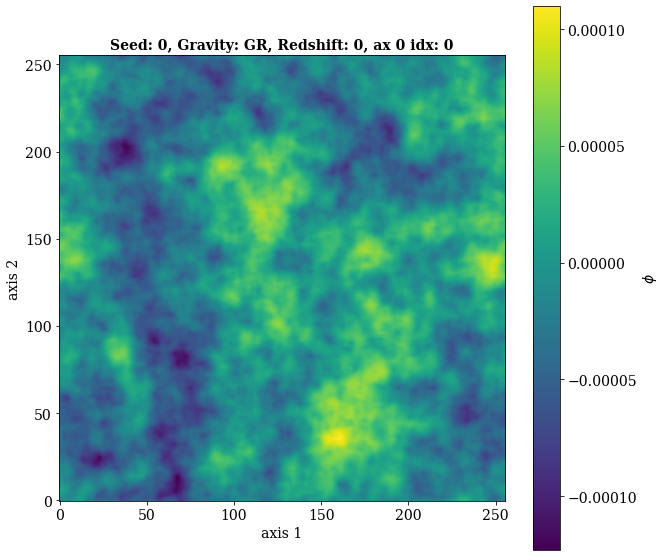

In [10]:
gr_v_path = datapath + f"seed{seeds[0]:04d}/gr/gr_snap005_phi.h5"
cube_obj = cube.Cube(gr_v_path)
vis = vc.VisualiseCube(cube_obj, axis=0)
# HTML(vis.anim.to_jshtml())
# Snaposhot only when uploading to github

I will denote the power spectra outputed by gevolution with a superscript $gev$, by class with $CLASS$ and camb $CAMB$. Thus, we have the following quantities:

* $P_\delta^{gev}(k)$ -> Matter power spectrum from gevolution
* $P_\delta^{CLASS}(k)$ -> Matter power spectrum from CLASS
* $P_\delta^{CAMB}(k)$ -> Matter power spectrum from CAMB
* $P_\phi^{gev}(k)$ -> Potential power spectrum from gevolution
* $P_\phi(k)$ -> Potential power spectrum directly calculated from the datacube, using Pylians

### Matter power spectrum
We start off with plotting the matter power spectra generated by gevolution itself, $P_\delta^{gev}(k)$, for three different seeds and at three different redshifts, namely $z\in[0,1,10]$. All spectra are compared with CAMB and CLASS spectra. We also plot the average power spectra at each redshift computed from every $20$-th seed. We limit the plot to only show valid moodes, within the range of the boxsize and the Nyquist frequency.

In [6]:
add_objects = [pps.AddPowerSpectraComponents(datapath +f"seed{seeds[i]:04d}/") for i in range(len(seeds))]

def compare_seeds(ps_objects, pk_type, redshift):
    temp_fig = CustomFigure()
    colors = ["r", "g", "b"]
    settings = {
            "xscale": "log",
            "yscale": "log",
            "xlabel": r"k $[h/Mpc]$",
            "ylabel": r"P(k) $[h/Mpc]^3$",
            "title": rf"$P_\{pk_type}^{{gev}}(k)$ at redshift $z_p={redshift:.1f}$, for $S = {seeds}$",
            "xlim": (k_boxsize, k_nyquist),
            "ylim": (1e0, 1e5) if pk_type == "delta" else (1e-10, 1e2)
        }
    temp_fig.set_settings(settings)
    lines = []
    for i in range(len(ps_objects)):
        lines.extend(add_objects[i].add_gr_newton_gev(pk_type=pk_type, redshift=redshift, color=colors[i]))

    
    avg_line = add_objects[0].add_averages(pk_type=pk_type, redshift=redshift, seed_range=np.arange(0,2000,20, dtype=int), color="cyan")
    
    for line in lines:
        temp_fig.ax.add_line(line)
    temp_fig.ax.add_line(avg_line[0])
    temp_fig.ax.add_line(avg_line[1])

    leg1 = temp_fig.ax.legend(handles=lines[:6][::2]+[avg_line[0]], labels=seeds+["Avg"], loc="upper right")
    if pk_type == "delta":
        lines.append(add_objects[0].add_CAMB_spectrum(redshift, color="purple"))
        lines.append(add_objects[0].add_CLASS_spectrum(redshift, color="orange"))
        leg2 = temp_fig.ax.legend(handles=lines[6:], labels=["CAMB", "CLASS"], loc="lower right")
        temp_fig.ax.add_artist(leg2)
    temp_fig.ax.add_artist(leg1)
    add_objects[0]._add_gr_newton_legend(temp_fig.ax)
    temp_fig.fig.tight_layout()
    temp_fig.fig.show()



Averaging over a total of 100 seeds ranging over: [0 - 1980] in incriments of 20.


/tmp/ipykernel_385655/168733799.py:37: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  temp_fig.fig.show()


Averaging over a total of 100 seeds ranging over: [0 - 1980] in incriments of 20.


/tmp/ipykernel_385655/168733799.py:37: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  temp_fig.fig.show()


Averaging over a total of 100 seeds ranging over: [0 - 1980] in incriments of 20.


/tmp/ipykernel_385655/168733799.py:37: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  temp_fig.fig.show()


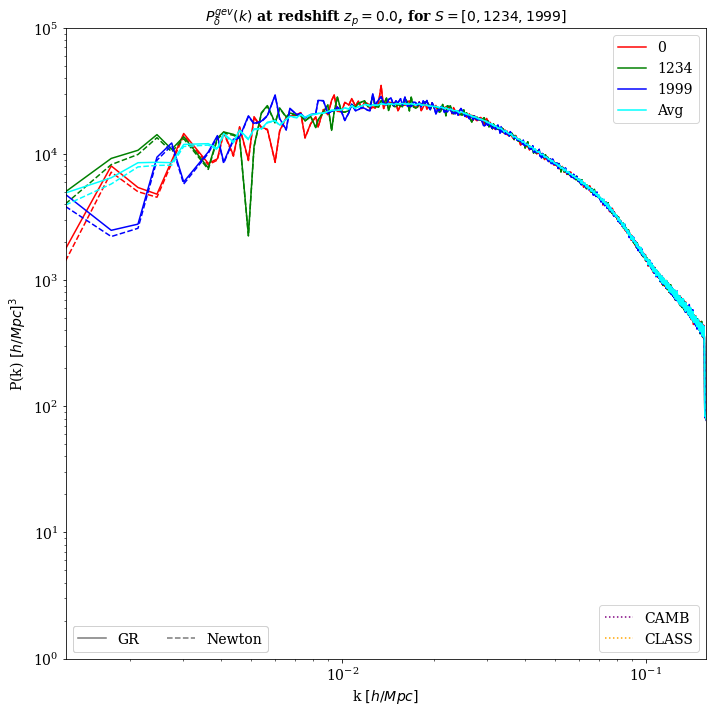

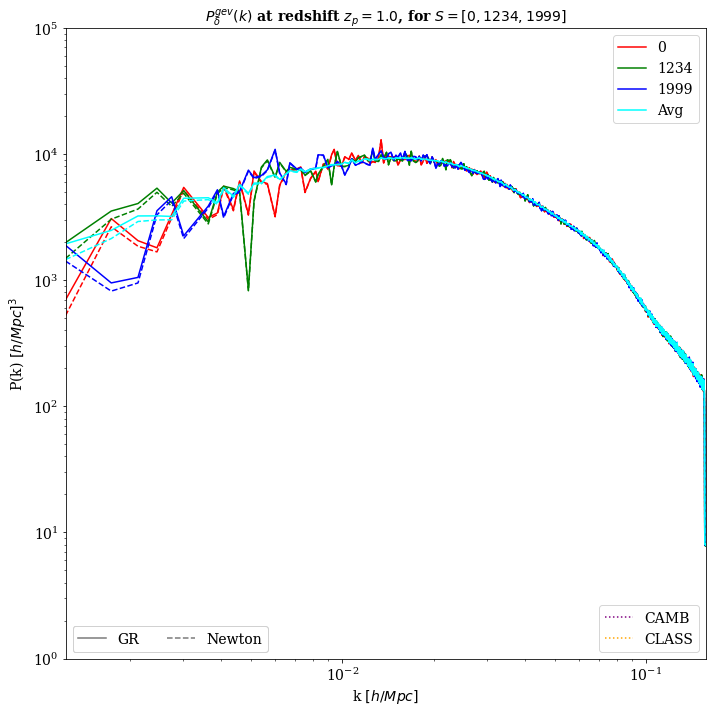

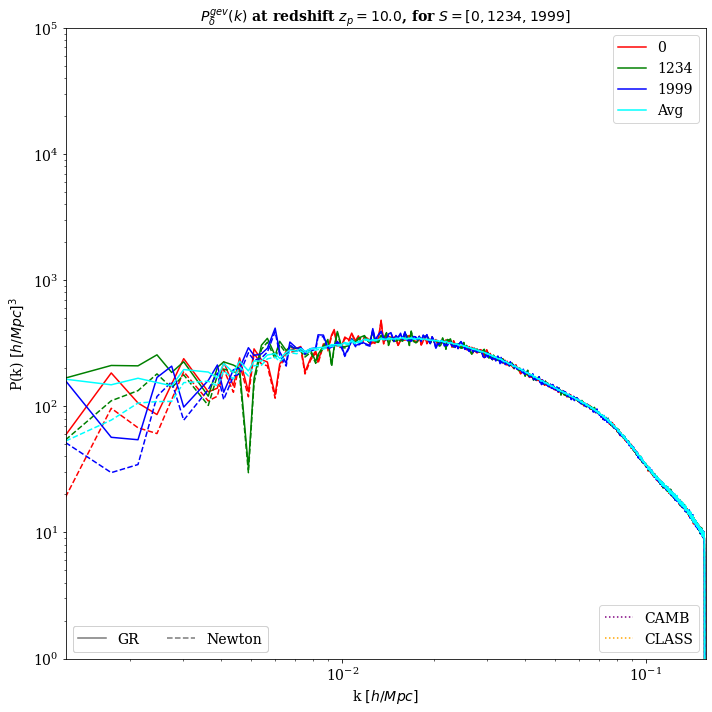

In [7]:
compare_seeds(add_objects, "delta", redshift=0)
compare_seeds(add_objects, "delta", redshift=1)
compare_seeds(add_objects, "delta", redshift=10)

The gevolution power spectra seem to agree with CAMB and CLASS quite well. We would expect the newtonian and  general relativistic power spectra to be indistinguishable so the difference on largre scale in the plots above are due to the spectra being in different gauges: newtonian gauge for newtonian  and synchronous gauge for GR. This effect is larger at higher redshifts.

The large fluctuations on large scales are due to cosmic variance.

Small conclusion: The power spectra generated by gevolution reproduces the ones obtained from CLASS and CAMB.

We now turn to the power spectra of the potential $\phi$, which is gauge invariant. We will compare the one produced by gevolution and the one computed from the datacube usin Pylians. We use the same seeds and the same redshift as before.

Averaging over a total of 100 seeds ranging over: [0 - 1980] in incriments of 20.


/tmp/ipykernel_385655/168733799.py:37: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  temp_fig.fig.show()


Averaging over a total of 100 seeds ranging over: [0 - 1980] in incriments of 20.


/tmp/ipykernel_385655/168733799.py:37: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  temp_fig.fig.show()


Averaging over a total of 100 seeds ranging over: [0 - 1980] in incriments of 20.


/tmp/ipykernel_385655/168733799.py:37: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  temp_fig.fig.show()


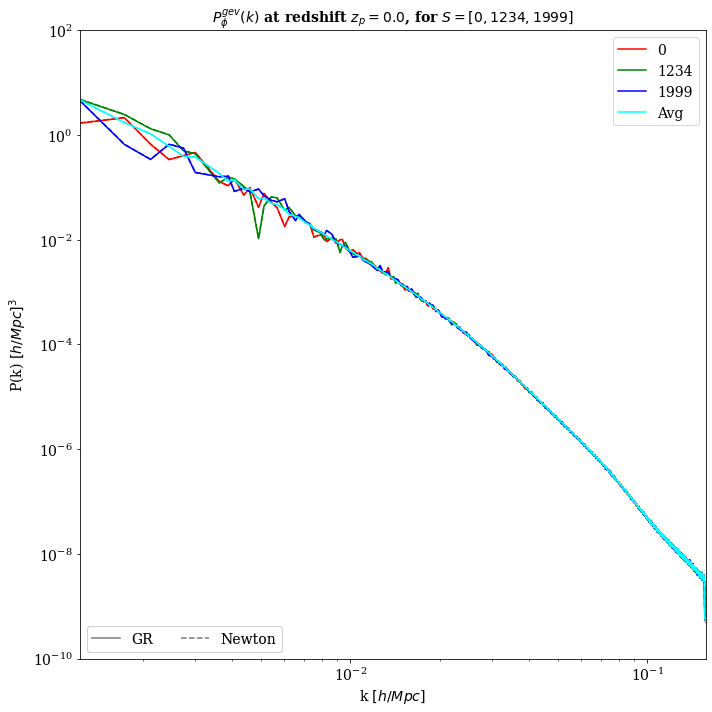

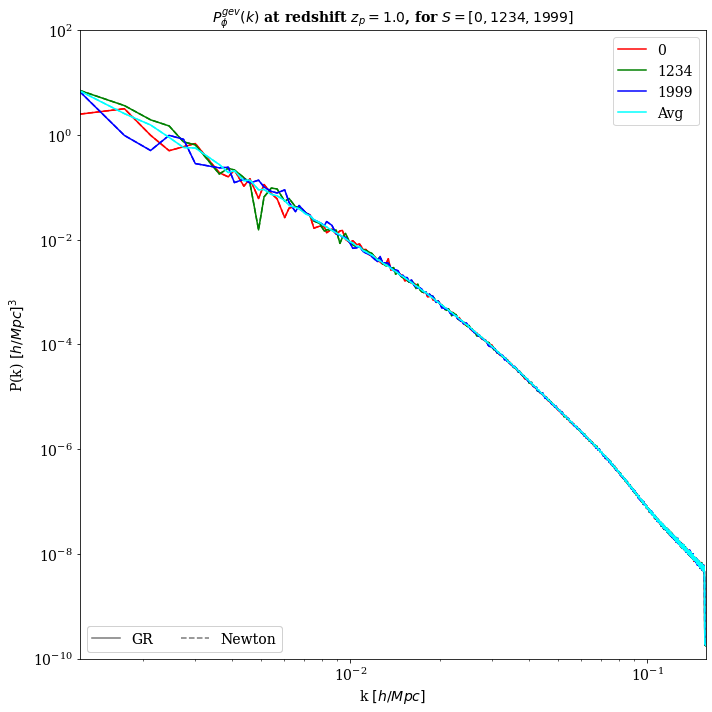

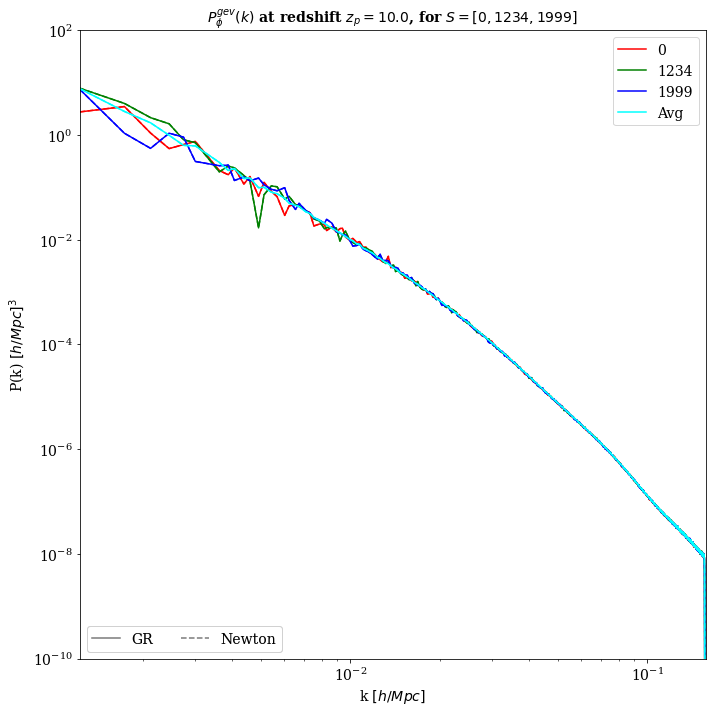

In [8]:
compare_seeds(add_objects, "phi", redshift=0)
compare_seeds(add_objects, "phi", redshift=1)
compare_seeds(add_objects, "phi", redshift=10)

We see from the above plots that there is complete overlap between the GR and newton runs as we would expect.


We move on to comparing the power spectra from gevolution and the cube directly:

/net/hume.uio.no/uio/hume/student-u00/johanmkr/Documents/thesis/ML/src/data/plotPS.py:220: UserWarning: The label '_child1' of <matplotlib.lines.Line2D object at 0x7faca6165780> starts with '_'. It is thus excluded from the legend.
  leg1 = cube_plot.ax.legend(handles=lines, loc="upper right")
/net/hume.uio.no/uio/hume/student-u00/johanmkr/Documents/thesis/ML/src/data/plotPS.py:220: UserWarning: The label '_child3' of <matplotlib.lines.Line2D object at 0x7faca6198ca0> starts with '_'. It is thus excluded from the legend.
  leg1 = cube_plot.ax.legend(handles=lines, loc="upper right")


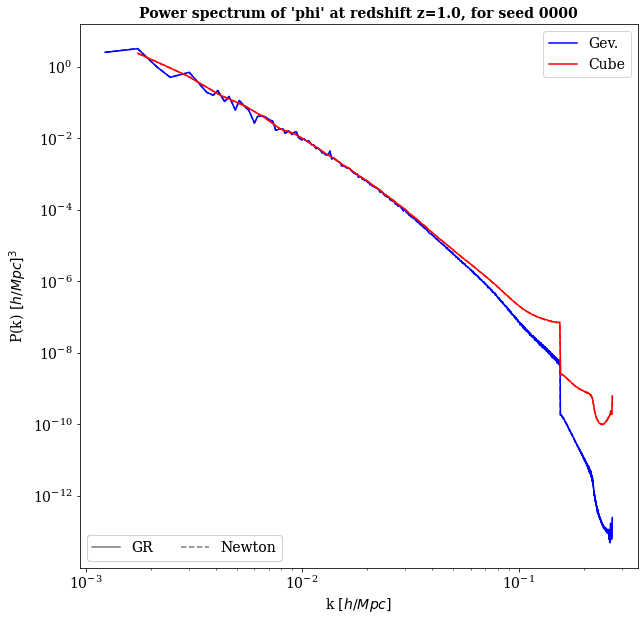

/net/hume.uio.no/uio/hume/student-u00/johanmkr/Documents/thesis/ML/src/data/plotPS.py:220: UserWarning: The label '_child1' of <matplotlib.lines.Line2D object at 0x7faca63fa8c0> starts with '_'. It is thus excluded from the legend.
  leg1 = cube_plot.ax.legend(handles=lines, loc="upper right")
/net/hume.uio.no/uio/hume/student-u00/johanmkr/Documents/thesis/ML/src/data/plotPS.py:220: UserWarning: The label '_child3' of <matplotlib.lines.Line2D object at 0x7faca64923e0> starts with '_'. It is thus excluded from the legend.
  leg1 = cube_plot.ax.legend(handles=lines, loc="upper right")


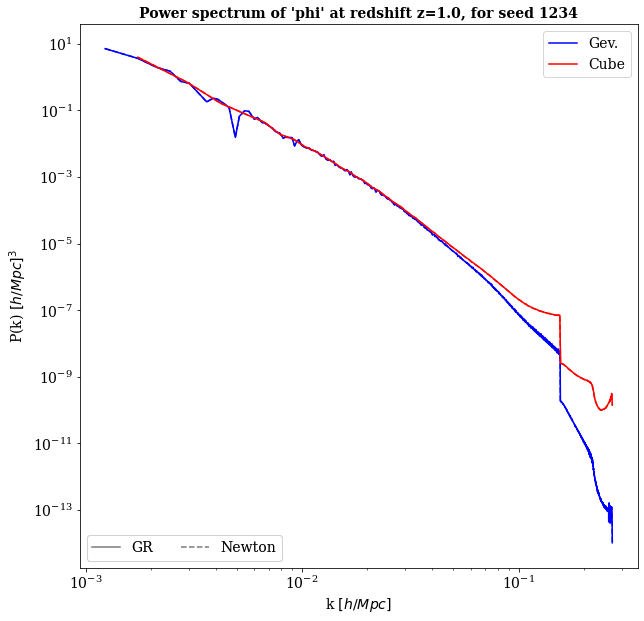

/net/hume.uio.no/uio/hume/student-u00/johanmkr/Documents/thesis/ML/src/data/plotPS.py:220: UserWarning: The label '_child1' of <matplotlib.lines.Line2D object at 0x7facb251bbe0> starts with '_'. It is thus excluded from the legend.
  leg1 = cube_plot.ax.legend(handles=lines, loc="upper right")
/net/hume.uio.no/uio/hume/student-u00/johanmkr/Documents/thesis/ML/src/data/plotPS.py:220: UserWarning: The label '_child3' of <matplotlib.lines.Line2D object at 0x7facb252d060> starts with '_'. It is thus excluded from the legend.
  leg1 = cube_plot.ax.legend(handles=lines, loc="upper right")


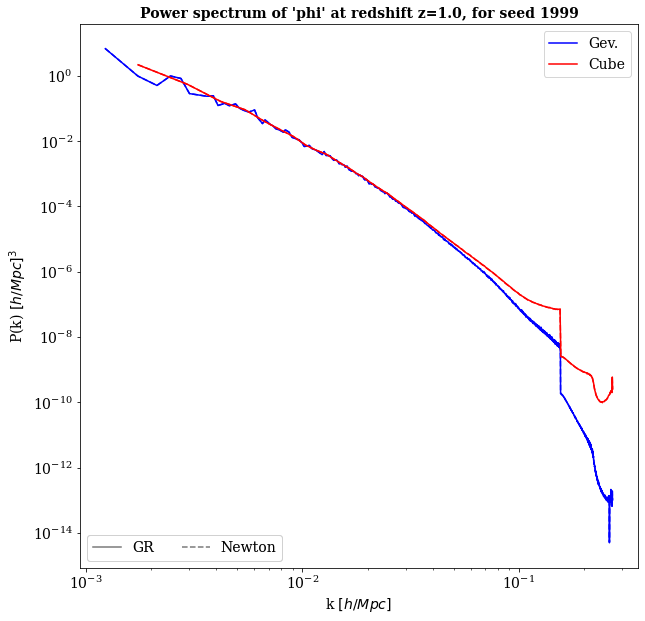

In [9]:
MF = pps.MakeFigures(datapath)
MF.plot_cube_ps(seeds, redshift=1.0)

**Comment this**

## Left to do in terms of power spectra analysis
* Power spectra of $\phi$ from CLASS.
* Class output in different gauges to investigate the gauge difference